# Python Libraries

### Main code is below.

For this tutorial, we are going to explore the python libraries that include functionality that corresponds with the material discussed in the course.

The primary package we will be using is:

* **Statsmodels:** a library that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, exploring data, and constructing models.  

*__ATTN__: If you are not familiar with the following packages:*  

* **Numpy** is a library for working with arrays of data.  

* **Pandas** is a library for data management, manipulation, and analysis.  

* **Matplotlib** is a library for making visualizations.  

* **Seaborn** is a higher-level interface to Matplotlib that can be used to simplify many visualization tasks.  

We recommend you check out the first and second courses of the Statistics with Python specialization, **Understanding and Visualizing Data** and **Inferential Statistical Analysis with Python**.

*__Important__: While this notebooks provides insight into the basics of these libraries,  it is recommended that you dig into the documentation available online.*

## StatsModels

The StatsModels library is extremely extensive and includes functionality ranging from statistical methods to advanced topics such as regression, time-series analysis, and multivariate statistics.

We will mainly be looking at the stats, OLS, and GLM sub-libraries.  However, we will begin by reviewing some functionality that has been referenced in earlier course of the Statistics with Python specialization.

In [1]:
import statsmodels.api as sm
import numpy as np

### Stats

#### Descriptive Statistics

In [2]:
# Draw random variables from a normal distribution with numpy
normalRandomVariables = np.random.normal(0,1, 1000)

# Create object that has descriptive statistics as variables
x = sm.stats.DescrStatsW(normalRandomVariables)

print(x)
# normalRandomVariables

As you can see from the above output, we have created an object with type: "statsmodels.stats.weightstats.DescrStatsW".  

This object stores various descriptive statistics such as mean, standard deviation, variance, ect. that we can access.

In [3]:
# Mean
print(x.mean)

# Standard deviation
print(x.std)

# Variance
print(x.var)

-0.048444873193987895
1.000409326355272
1.000818820258609


The output above shows the mean, standard deviation, and variance of the 1000 random variables we drew from the distribution we generated above.

There are other interesting things you can do with this object, such as generating confidence intervals and hypothesis testing.

#### Confidence Intervals

In [4]:
# Generate confidence interval for a population proportion

tstar = 1.96

# Observer population proportion
p = .85

# Size of population
n = 659

# Construct confidence interval
sm.stats.proportion_confint(n * p, n)

(0.8227378265796143, 0.8772621734203857)

The above output includes the lower and upper bounds of a 95% confidence interval of population proportion.

In [5]:
import pandas as pd

# Import data that will be used to construct confidence interval of population mean
df = pd.read_csv("https://raw.githubusercontent.com/UMstatspy/UMStatsPy/master/Course_1/Cartwheeldata.csv")

# Generate confidence interval for a population mean
sm.stats.DescrStatsW(df["CWDistance"]).zconfint_mean()

(76.57715593233024, 88.38284406766977)

The output above shows the lower and upper bounds of a 95% confidence interval of population mean.

These functions should be familiar, if not, we recommend you take course 2 of our specialization.
#### Hypothesis Testing

In [6]:
# One population proportion hypothesis testing

# Population size
n = 1018

# Null hypothesis population proportion
pnull = .52

# Observe population proportion
phat = .56

# Calculate test statistic and p-value
sm.stats.proportions_ztest(phat * n, n, pnull)

(2.571067795759113, 0.010138547731721065)

In [7]:
# Using the dataframe imported above, perform a hypothesis test for population mean
sm.stats.ztest(df["CWDistance"], value = 80, alternative = "larger")

(0.8234523266982029, 0.20512540845395266)

The outputs above are the test statistics and p-values from the respective hypothesis tests.

If you'd like to review these functions on your own, the stats sub-library documentation can be found at the following url: https://www.statsmodels.org/stable/stats.html

This concludes the review portion of this notebook,  now we are going to introduce the OLS and GLM sub-libraries and the functions you will be seeing throughout this course.

# OLS (Ordinary Least Squares), GLM (Generalized Linear Models), GEE (Generalize Estimated Equations), MIXEDLM (Multilevel Models)

The OLS, GLM, GEE, and MIXEDLM sub-libraries are the primary libraries in statsmodels that we will be utilizing in this course to create various models.

Below, we will give a brief description of each model and a skeleton of the functions you will see going forward in the course.  This is simply for you to get familiar with these concepts and to prepare you for the coming weeks.  If their application at this time seems a bit ambigious have no fear as they will be discussed in detail throughout this course!

For each of the following models, we follow our similar structure which means we will be following our structure of Dependent and Independent Variables, with a few caveats that will be expressed below.

#### Ordinary Least Squares

Ordinary Least Squares is a method for estimating the unknown parameters in a linear regression model.  This is the function we will use when our target variable is continuous.

In [8]:
da = pd.read_csv("../../Course 2- Inferential Statistics with Python/NHANES/nhanes_2015_2016.csv")

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI",
        "SMQ020", "SDMVSTRA", "SDMVPSU"]
da = da[vars].dropna()

da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx", data=da)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Sun, 16 Aug 2020   Prob (F-statistic):          1.87e-268
Time:                        18:30:02   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.71

The above code is creating a multiple linear regression where the target variable is BPXSY1 and the two predictor variables are RIDAGEYR and RIAGENDRx.

Note that the target variable, BPXSY1, is a continous variable that represents blood pressure.

#### Generalized Linear Models

While generalized linear models are a broad topic, in this course we will be using this suite of functions to carry out logistic regression.  Logistic regression is used when our target variable is a binary outcome, or a classification of two groups, which can be denoted as group 0 and group 1.

In [9]:
da["smq"] = da.SMQ020.replace({2: 0, 7: np.nan, 9: np.nan})
model = sm.GLM.from_formula("smq ~ RIAGENDRx", family=sm.families.Binomial(), data=da)
res = model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5092
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3350.6
Date:                Sun, 16 Aug 2020   Deviance:                       6701.2
Time:                        18:30:03   Pearson chi2:                 5.09e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7547      0.04

Above is a example of creating a logistic model where the target value is SMQ020x, which in this case is whether or not this person is a smoker or not.  The predictor is RIAGENDRx, which is gender.

#### Generalized Estimated Equations

Generalized Estimating Equations estimate generalized linear models for panel, cluster or repeated measures data when the observations are possibly correlated within a cluster but uncorrelated across clusters.  These are used primarily when there is uncertainty regarding correlation between outcomes. "Generalized Estimating Equations" (GEE) fit marginal linear models, and estimate intraclass correlation.

In [10]:
da["group"] = 10*da.SDMVSTRA + da.SDMVPSU
model = sm.GEE.from_formula("BPXSY1 ~ 1", groups="group", cov_struct=sm.cov_struct.Exchangeable(), data=da)
res = model.fit()
print(res.cov_struct.summary())


The correlation between two observations in the same cluster is 0.030


Here we are creating a marginal linear model of BPXSY1 to determine the estimated ICC value, which would indicate whether or not there are correlated clusters of BPXSY1.

#### Multilevel Models

Similarly to GEEs, we use multilevel models when there is potential for outcomes to be grouped together which is not uncommon when using various sampling methods to collect data.

In [11]:
for v in ["BPXSY1", "RIDAGEYR", "BMXBMI", "smq", "SDMVSTRA"]:
    model = sm.GEE.from_formula(v + " ~ 1", groups="group",
           cov_struct=sm.cov_struct.Exchangeable(), data=da)
    result = model.fit()
    print(v, result.cov_struct.summary())

BPXSY1 The correlation between two observations in the same cluster is 0.030
RIDAGEYR The correlation between two observations in the same cluster is 0.035
BMXBMI The correlation between two observations in the same cluster is 0.039
smq The correlation between two observations in the same cluster is 0.026
SDMVSTRA The correlation between two observations in the same cluster is 0.959


What's nice about the statsmodels library is that all the models follow the similar structure and syntax.  


Documentation and examples of these models can be found at the following links:

* OLS: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

* GLM: https://www.statsmodels.org/stable/glm.html

* GEE: https://www.statsmodels.org/stable/gee.html

* MIXEDLM: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

Feel free to read up on these sub-libraries and their use cases.  In week 2 you will see examples of OLS and GLM, where in week 3, we will be implementing GEE and MIXEDLM.

# Getting Started with Modeling in Python

## Data Modeling in Python

As discussed in week one of this course,  we will be investigating how to develop various statistical models around data.

Modeling plays a significant role in data analysis and builds upon fundamental concepts of statistics.  By fitting models to data we are able to accomplish the following:

* __Estimate__ distributional properties of variables, potentially conditional on other variables.

* Concisely __summarize relationships__ between variables, and make inferential statements about those relationships.

* __Predict__ values of variables of interest conditional on values of other predictor varialbes, and characterize prediction uncertainty.

With these concepts in mind, we will overview modeling structure and carrying out exploratory data analysis on a dataset that contains information about homes in Boston, MA and how we may want to approach modeling prices of homes.

#### Import Libraries & Read in Data

To begin, let's import our libraries and dataset.

In [12]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from sklearn.datasets import load_boston
boston_dataset = load_boston() 

boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

boston["MEDV"] = boston_dataset.target

#### Investigate Dataset

Now that we have loaded our dataset, let's get a feel for what data our data looks like:

In [13]:
boston.shape

(506, 14)

Based on the above output, we have 506 observations and 14 columns.  To get a better sense of the data, let's print column names:

In [14]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Now that we've seen our various columns, lets take a look at what each column represents:

* __CRIM:__ Per capita crime rate by town
* __ZN:__ Proportion of residential land zoned for lots over 25,000 sq. ft
* __INDUS:__ Proportion of non-retail business acres per town
* __CHAS:__ Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* __NOX:__ Nitric oxide concentration (parts per 10 million)
* __RM:__ Average number of rooms per dwelling
* __AGE:__ Proportion of owner-occupied units built prior to 1940
* __DIS:__ Weighted distances to five Boston employment centers
* __RAD:__ Index of accessibility to radial highways
* __TAX:__ Full-value property tax rate per $\$10,000$
* __PTRATIO:__ Pupil-teacher ratio by town
* __B:___ $1000(Bk — 0.63)^2$, where Bk is the proportion of [people of African American descent] by town
* __LSTAT:__ Percentage of lower status of the population
* __MEDV:__ Median value of owner-occupied homes in $\$1000$s

Here's a view of the first five rows of our dataframe:

In [15]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Handle Missing Data

Before we get started and discuss how to approach a modeling problem, it's good practice to observe our data thoroughly to identify missing values and handle them accordingly:

In [16]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Fortunately, our output indicates that none of our columns contain missing values so we are able to continue on.

#### Modeling Structure

Given the information above of the Boston dataset above, let's consider an interesting modeling problem.  When a consumer is looking to buy a house, its good practice to cross-examine the price of a potential home with the going rate of the market to ensure you aren't overpaying.  Modeling this data would enable a consumer to ensure a home is within the ballpark price range of similar homes in the area.

Now, before we begin, let's discuss the standard structure of our model.  As discussed in lecture, models have two primary characteristics,  Dependent Variables (DVs) and Independent Variables (IVs):

![dv-iv.png](../img/dv-iv.png)

Since we are building a model to determine the estimated price of a home, our __dependent variable__ in the case of the Boston dataset is __MEDV__, which is the median value of owner-occupied homes in $\$1000$s.

Next, we define our independent variables or predictors.  Predictors are typically chosen based on their perceived relationship to our primary variable on interest, or price of home.  For example,  our gut instinct tells us that the number of rooms (variable __RM__ in our dataset) would greatly impact the price of a home becasue it implies more square-footage.  Additionally, we may want to consider crime rate (variable __CRIM__ in our dataset) as a proxy for the quality of the neighboorhood the home resides in.  

Our initial intepretation of these independent variables suggests that __RM__ has a positive correlation with __MEDV__ and __CRIM__ has a negative correlation with __MEDV__.

While our initial assumptions about our data and our instincts with respect to correlation between our target variable and predictors may be true, we must carry out some exploratory analysis to confirm these assumptions and/or unravel new findings.

#### Exploratory Data Analysis

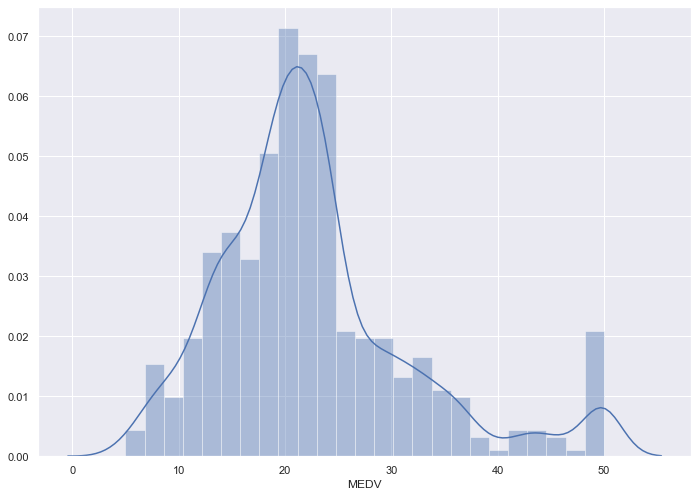

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston["MEDV"], bins = 25)
plt.show()

As you can see, our target variable __MEDV__ follows a normal distribution. However, there are outliers near the upper quantiles.

One of the most important steps in modeling is understanding the relationship our variables have with each other.  A relationship between two variables is also denoted as correlation is statistics.  A figure known as a correlation matrix, can be used to measure the linear relationships between variables.

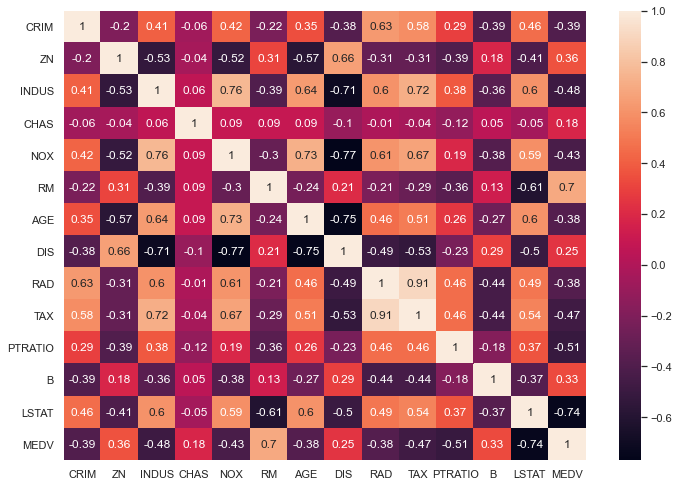

In [18]:
correlation_matrix = boston.corr().round(2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Correlation coefficients range from -1 to 1, which determines the strength of correlation.  Values close to 1 signify a strong positive relationship, whereas values close to -1 indicate a strong negative relationship.

With this heatmap, we can see corellation coefficients for each of our potential predictors values and __MEDV__, our target values.  Interestingly, our initial gut instincts of __RM__ and __CRIM__.  __RM's__ coefficient is 0.7, and __CRIM's__ is -0.39, signifying a postive and negative relationship as suggested.

To further investigate individual individual predictors, we can plot their values against the value of __MEDV__.  This with allow us to infer whether or not the relationship is linear, or if further transformations are required.

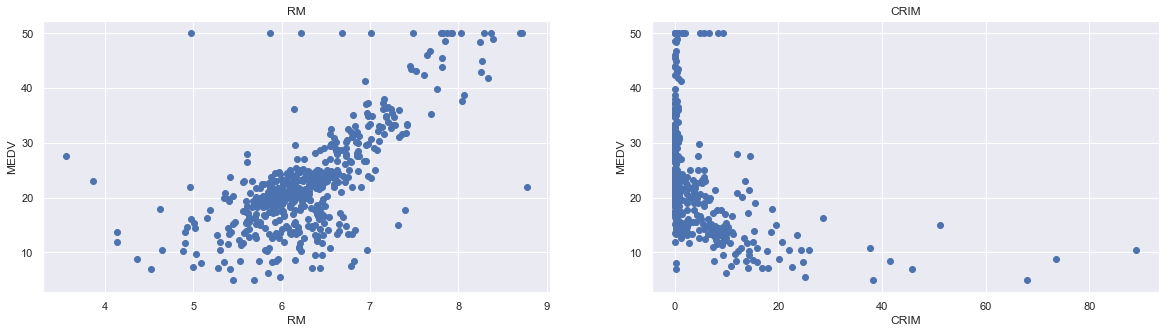

In [19]:
plt.figure(figsize=(20, 5))

features = ['RM', 'CRIM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Here we can see that our relationship between __RM__ and __MEDV__ is very linear which suggests we do not need to do any further manipulation of our data.  However, our plot of __CRIM__ and __MEDV__ is extremely skewed.  Notice that there little separation between our __CRIM__ values.  There is a cluster of values between 0 and 20.

When thinking about linear models, we can do transformations that manipulate our data so that our variables have stronger linear relationships.  

One common transformation is the __log transformation__, which _stretches_ our values out.  This can be shown below:

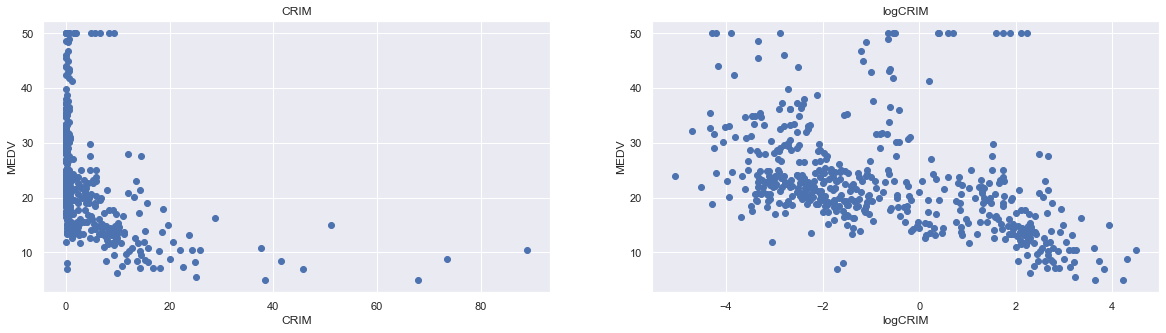

In [20]:
plt.figure(figsize=(20, 5))

boston["logCRIM"] = np.log(boston["CRIM"])

features = ['CRIM', 'logCRIM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

The plots above show a before and after where the log transformation is applied to __CRIM__.  On the righthand side, we can see that there is a drastic difference in the separation of our values and the negative linear correlation between __MEDV__ and __logCRIM__ is more apparent than between __MEDV__ and __CRIM__ (without the log transformation).

Now that we have identified some potential predictors for our model and have throughly investigated their relationship with our target variable, we can begin constructing a model, however thats going to be all for this notebook.  These topics will be discussed in more detail in the coming weeks and you will have the opportunity to read case studies and practice developing models on your own in python!

If you have some extra time this week and would like to practice, feel free to use this notebook as a template for carrying out your own exploratory analysis on a dataset of your choice.  

Getting in the mindset of exploring data and visualizing relationships between variables will pay dividends for the rest of the course as we delve further into fitting statistical models to data with python!